# Intro

The main goals of these projects are: to understand how machine learning works; and to learn how to use the most common Python libraries for machine learning: sklearn, TensorFlow and PyTorch.

In this particular notebook I will try to model the elementary function $x^2$ from a randomly generated data set.  Since this is a __non-linear regression problem__, to accomplish this, I will use the following methods: decision trees, random forests, gradient boosting, and neural networks.

## Libraries and modules

In this cell, we import all the libraries and modules that will be used throught this notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import torch

from sklearn import ensemble, tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


## Random data set

In this cell, we construct the data set.  First, we define the function $x^2$, then we create $n$ randomly chosen points around the curve $(x, x^2)$, and finally we split the data set into training and testing data subsets.

In [ ]:
# The function that the ML will learn
def f(x : float) -> float:
    return x*x

# Construct the data
n = 100    # size of the data
X = np.random.rand(n, 1)
Y = np.array([f(i) for x in X for i in x])
# print(f"X: {X}")
# print(f"Y: {Y}")

# Add noise to the data
noise = np.random.rand(n, 1)
noise = [float(z)/50 - 0.01 for z in noise]
# print(noise)
Y = Y + noise
# print(f"Y: {Y}")

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
# print(f"X_train: {X_train}")
# print(f"X_test: {X_test}")
# print(f"Y_train: {Y_train}")
# print(f"Y_test: {Y_test}")


## Decision tree

In [20]:
# Decision tree

decision_tree = tree.DecisionTreeRegressor(max_depth=8)
decision_tree = decision_tree.fit(X_train, Y_train)


In [ ]:
# Tune hyperparameters

## Create a dictionary listing all the parameters that will be tested
parameters = {'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
              'splitter': ["best", "random"],
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11),
              'max_depth': range(1, 11)
}

## Perform an exhaustive test through all the parameters
grid_search = GridSearchCV(decision_tree, parameters).fit(X_train, Y_train)

## Display the results
display(pd.DataFrame(grid_search.cv_results_))

## Print the best option
grid_search.best_estimator_
# Be careful: the best result may lead to overfitting!


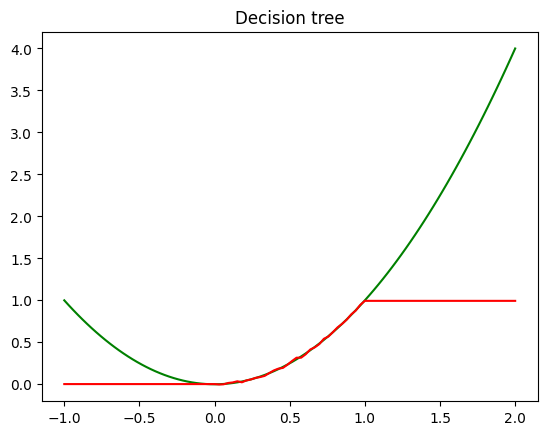

In [21]:
# Plot the result

T = np.linspace(-1, 2, 100)
F = [f(t) for t in T]
G = [decision_tree.predict([[t]]) for t in T]

plt.title("Decision tree")
plt.plot(T, F, color = "green")
plt.plot(T, G, color = "red")


In [22]:
# Evaluation

Y_predicted = decision_tree.predict(X_test)
Y_eval = decision_tree.predict(X_train)

print(f"R2: {r2_score(Y_test, Y_predicted)} (test), {r2_score(Y_train, Y_eval)} (train)")    # close to 1 is good
print(f"MAE: {mean_absolute_error(Y_test, Y_predicted)} (test), {mean_absolute_error(Y_train, Y_eval)} (train)")    # close to 0 is good
print(f"MSE: {mean_squared_error(Y_test, Y_predicted)} (test), {mean_squared_error(Y_train, Y_eval)} (train)")    # close to 0 is good


R2: 0.9983441049622828 (test), 0.9999998551420818 (train)
MAE: 0.008724802499285868 (test), 3.206958118735671e-05 (train)
MSE: 0.00011449403801279927 (test), 1.3265702277472382e-08 (train)


## Random forest

In [24]:
# Random Forest

random_forest = ensemble.RandomForestRegressor(bootstrap=False, max_depth=7)
random_forest = random_forest.fit(X_train, Y_train)


In [ ]:
# Tune hyperparameters (part I)

## Create a dictionary listing parameters that will be randomly tested
parameters = {'bootstrap': [True, False],
              'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11),
              'max_depth': range(1, 11)
}

## Perform a random search through the parameters
random_search = RandomizedSearchCV(random_forest, parameters).fit(X_train, Y_train)

## Display the results
display(pd.DataFrame(random_search.cv_results_))

## Print the best option
random_search.best_estimator_


In [ ]:
# Tune hyperparameters (part II)

## Create a dictionary listing all the parameters that will be tested
parameters = {'bootstrap': [True, False],
              'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5),
              'max_depth': range(4, 8)
}

## Perform an exhaustive test through all the parameters
grid_search = GridSearchCV(random_forest, parameters).fit(X_train, Y_train)

## Display the results
display(pd.DataFrame(grid_search.cv_results_))

## Print the best option
grid_search.best_estimator_


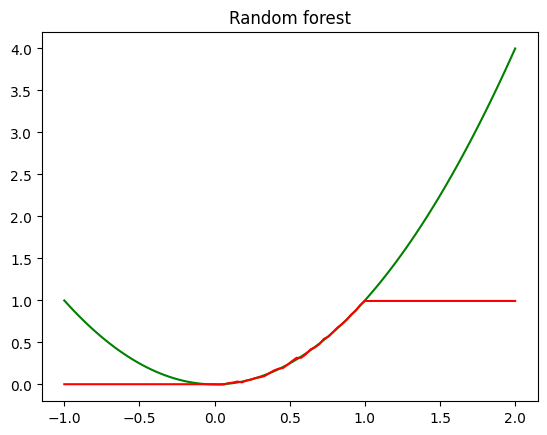

In [25]:
# Plot the result

T = np.linspace(-1, 2, 100)
F = [f(t) for t in T]
H = [random_forest.predict([[t]]) for t in T]

plt.title("Random forest")
plt.plot(T, F, color = "green")
plt.plot(T, H, color = "red")


In [26]:
# Evaluate the method

Y_predicted = random_forest.predict(X_test)
Y_eval = random_forest.predict(X_train)

print(f"R2: {r2_score(Y_test, Y_predicted)} (test), {r2_score(Y_train, Y_eval)} (train)")
print(f"MAE: {mean_absolute_error(Y_test, Y_predicted)} (test), {mean_absolute_error(Y_train, Y_eval)} (train)")
print(f"MSE: {mean_squared_error(Y_test, Y_predicted)} (test), {mean_squared_error(Y_train, Y_eval)} (train)")


R2: 0.9983630556415704 (test), 0.9999917588762334 (train)
MAE: 0.008675536035505716 (test), 0.0004061561625895608 (train)
MSE: 0.00011318372561660485 (test), 7.5470016210167e-07 (train)


## Gradient boosting

In [27]:
# Gradient Boosting

gradient_boosting = ensemble.GradientBoostingRegressor(learning_rate=0.19, max_depth=8, min_samples_leaf=2, min_samples_split=19, n_estimators=37)
gradient_boosting = gradient_boosting.fit(X_train, Y_train)


In [ ]:
# Tune hyperparameters (part I)

## Begin with a randomized search in a large set of parameters
parameters = {'criterion': ["friedman_mse", "squared_error"],
              'loss': ["squared_error", "absolute_error", "huber", "quantile"],
              'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
              'max_depth': range(3, 20),
              'min_samples_leaf': range(1, 20),
              'min_samples_split': range(2, 20),
              'n_estimators': range(0, 100)
}

## Perform a randomized search through these parameters
random_search = RandomizedSearchCV(gradient_boosting, parameters).fit(X_train, Y_train)

## Display the results of the randmizeed search
display(pd.DataFrame(random_search.cv_results_))

## Print the best option
random_search.best_estimator_


In [ ]:
# Tune hyperparameters (part II)

## Now, we use the results of the randomized search above to do an exhaustive search.
## Create a more localized dictionary listing the parameters that will be exhautively tested
parameters = {'criterion': ["friedman_mse", "squared_error"],
              'loss': ["squared_error", "absolute_error", "huber", "quantile"],
              'learning_rate': [0.16, 0.17, 0.18, 0.19, 0.2],
              'n_estimators': range(35, 45),
              'max_depth': range(6, 15),
              'min_samples_leaf': range(2, 4),
              'min_samples_split': range(15, 20),
}

## Perform an exhaustive search through all these parameters
grid_search = GridSearchCV(gradient_boosting, parameters).fit(X_train, Y_train)

## Display the results
display(pd.DataFrame(grid_search.cv_results_))

## Print the best option
grid_search.best_estimator_


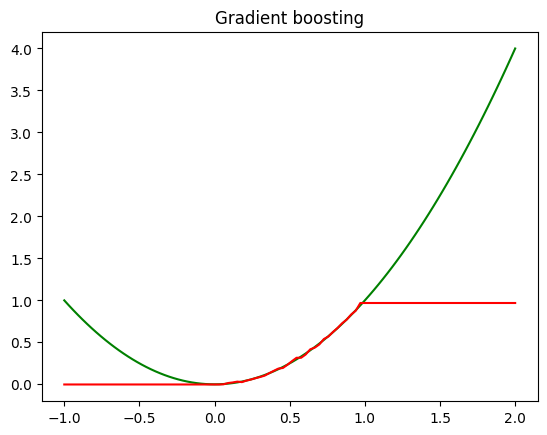

In [28]:
# Plot the result

T = np.linspace(-1, 2, 100)
F = [f(t) for t in T]
H = [gradient_boosting.predict([[t]]) for t in T]

plt.title("Gradient boosting")
plt.plot(T, F, color = "green")
plt.plot(T, H, color = "red")


In [29]:
# Evaluate the method

Y_predicted = gradient_boosting.predict(X_test)
Y_eval = gradient_boosting.predict(X_train)

print(f"R2: {r2_score(Y_test, Y_predicted)} (test), {r2_score(Y_train, Y_eval)} (train)")
print(f"MAE: {mean_absolute_error(Y_test, Y_predicted)} (test), {mean_absolute_error(Y_train, Y_eval)} (train)")
print(f"MSE: {mean_squared_error(Y_test, Y_predicted)} (test), {mean_squared_error(Y_train, Y_eval)} (train)")


R2: 0.9980442031407979 (test), 0.9997444346585075 (train)
MAE: 0.009869941669674996 (test), 0.0027785899333246365 (train)
MSE: 0.00013523023793313575 (test), 2.3403993206993977e-05 (train)


## Neural networks

### TensorFlow and Keras

In [ ]:
# Use neural network with TensorFlow Keras

layer_size = 8
NN1 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=layer_size, input_shape=[1], activation="relu"),
        tf.keras.layers.Dense(units=layer_size, activation="relu"),
        tf.keras.layers.Dense(units=1)
])
#NN1.summary()
compilacao = NN1.compile(optimizer="adam", loss="mae")

n_epochs = 80
treinamento = NN1.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=10, epochs=n_epochs)


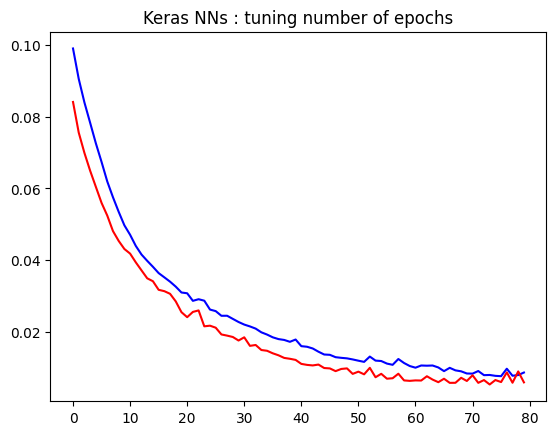

In [31]:
plt.title("Keras NNs : tuning number of epochs")
plt.plot(range(n_epochs), treinamento.history['loss'], color="blue")
plt.plot(range(n_epochs), treinamento.history['val_loss'], color="red")

1/1 [==============================] - 0s 44ms/step


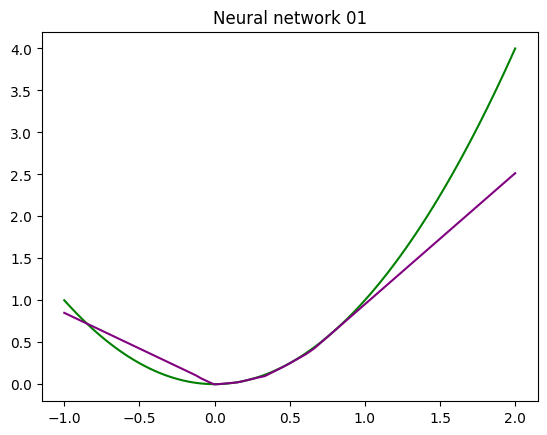

In [32]:
# Plot the result

T = np.linspace(-1, 2, 100)
F = [f(t) for t in T]
J = [NN1.predict([[t]])[0,0] for t in T]
#print(f"T: {T}")
#print(f"J: {J}")

plt.title("Neural network 01")
plt.plot(T, F, color = "green")
plt.plot(T, J, color = "purple")


In [33]:
# Evaluate the method

Y_predicted = NN1.predict(X_test)
Y_eval = NN1.predict(X_train)

print(f"R2: {r2_score(Y_test, Y_predicted)} (test), {r2_score(Y_train, Y_eval)} (train)")
print(f"MAE: {mean_absolute_error(Y_test, Y_predicted)} (test), {mean_absolute_error(Y_train, Y_eval)} (train)")
print(f"MSE: {mean_squared_error(Y_test, Y_predicted)} (test), {mean_squared_error(Y_train, Y_eval)} (train)")


3/3 [==============================] - 0s 4ms/step
R2: 0.9992222860576867 (test), 0.9985288514111951 (train)
MAE: 0.00581544084270869 (test), 0.008164324092193708 (train)
MSE: 5.377370403685378e-05 (test), 0.00013472386896358618 (train)


### PyTorch

In [34]:
# Neural netwrok with PyTorch
feature_tensor = torch.from_numpy(X).to(torch.float32)
label_tensor = torch.from_numpy(Y).to(torch.float32)

layer_size = 400
NN2 = torch.nn.Sequential(
        torch.nn.Linear(1, layer_size),
        torch.nn.ReLU(),
        torch.nn.Linear(layer_size, 1)
)

number_epochs = 100
# Why SGD, not Adam?
optimiser = torch.optim.SGD(NN2.parameters(), lr=0.01, momentum=0.001)
# MSE is the best loss/cost function for regression
loss_function = torch.nn.MSELoss()

for epoch in range(number_epochs):
    # Reset the gradient (this accumulates over runs otherwise).
    optimiser.zero_grad()

    # Run one of the inputs through the network 
    model_output = torch.reshape(NN2(feature_tensor), (-1,))

    # Use the loss function to measure how far away it is from the expected output.
    loss = loss_function(model_output, label_tensor)

    # Use backpropagation to update the model parameters.
    loss.backward()
    optimiser.step()

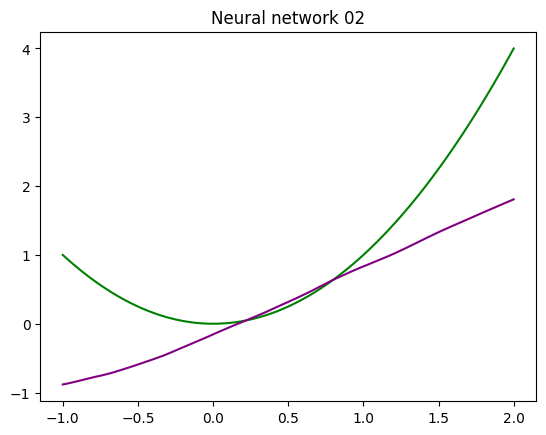

In [35]:
# Plot the result

T = np.linspace(-1, 2, 100)
F = [f(t) for t in T]
K = NN2(torch.tensor([[t] for t in T]).to(torch.float32)).detach().numpy()
#print(f"T: {T}")
#print(f"K: {K}")

plt.title("Neural network 02")
plt.plot(T, F, color = "green")
plt.plot(T, K, color = "purple")


In [36]:
# Evaluate the method

Y_predicted = NN2(torch.tensor(X_test).to(torch.float32)).detach().numpy()
Y_eval = NN2(torch.tensor(X_train).to(torch.float32)).detach().numpy()

print(f"R2: {r2_score(Y_test, Y_predicted)} (test), {r2_score(Y_train, Y_eval)} (train)")
print(f"MAE: {mean_absolute_error(Y_test, Y_predicted)} (test), {mean_absolute_error(Y_train, Y_eval)} (train)")
print(f"MSE: {mean_squared_error(Y_test, Y_predicted)} (test), {mean_squared_error(Y_train, Y_eval)} (train)")


R2: 0.9602539972580894 (test), 0.9540071142914488 (train)
MAE: 0.04693613608507765 (test), 0.05319031427364247 (train)
MSE: 0.002748169566992927 (test), 0.004211905958792026 (train)


## Conclusions and final remarks

The function $x^2$ is clearly a very simple function, but a good testing example for the regression methods that were implemented.  Notice that, by changing the definition of $f$ in the 'Random data set' section and running the following cells, one can experiment with different functions.

Now, regarding the results obtained for the function $x^2$, one can see that `Random forests` is the most accurate method amongst those that were implemented.  At the same time, `Decision trees` is the fastest one to train and the easiest one to tune.  It is also worth noticing that `Decision trees` and `Random forests` are very prone to overfitting.  Thus, one must pay close attention to the tuning of these methods.

Finally, notice that `Decision trees`, `Random forests` and `Gradient boosting` are not able to provide __any__ information about the values of the function $x^2$ outside the interval in which they were trained, $[0, 1]$.  However, the first neural network provides us some approximation for these values.  It would be interesting to find out whether it is possible to train the neural network in such a way that they give us better estimates for the values of $x^2$ outside the interval $[0,1]$.